In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs_aa

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs_aa already exists.
Error occurred while processing: outputs_aa.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module): 
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device) #Create random number of size (sample_size, nz)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz) #nz= batch size of fake data

# Q. Write training loop

118it [00:37,  3.11it/s]                                                                                               


Epoch 1 of 100
Generator loss: 1.45260036, Discriminator loss: 0.61148119


118it [00:38,  3.10it/s]                                                                                               


Epoch 2 of 100
Generator loss: 6.31440783, Discriminator loss: 0.07675827


118it [00:37,  3.19it/s]                                                                                               


Epoch 3 of 100
Generator loss: 10.42675877, Discriminator loss: 0.13532244


118it [00:36,  3.23it/s]                                                                                               


Epoch 4 of 100
Generator loss: 0.82162899, Discriminator loss: 0.90320927


118it [00:36,  3.21it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


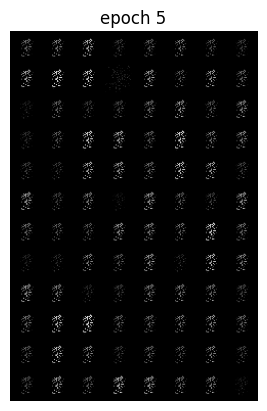

Epoch 5 of 100
Generator loss: 2.07962894, Discriminator loss: 0.64784384


118it [00:37,  3.18it/s]                                                                                               


Epoch 6 of 100
Generator loss: 5.08111811, Discriminator loss: 1.07487655


118it [00:37,  3.18it/s]                                                                                               


Epoch 7 of 100
Generator loss: 2.97455001, Discriminator loss: 0.88086796


118it [00:37,  3.17it/s]                                                                                               


Epoch 8 of 100
Generator loss: 1.09310973, Discriminator loss: 1.15684891


118it [00:37,  3.13it/s]                                                                                               


Epoch 9 of 100
Generator loss: 2.60415554, Discriminator loss: 0.58148217


118it [00:40,  2.91it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


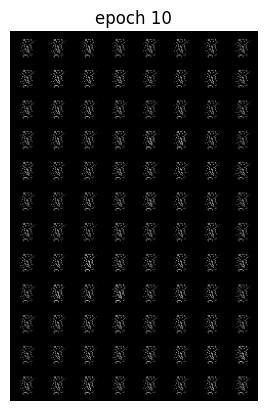

Epoch 10 of 100
Generator loss: 1.59052026, Discriminator loss: 1.20830202


118it [00:37,  3.14it/s]                                                                                               


Epoch 11 of 100
Generator loss: 1.56914330, Discriminator loss: 1.18979418


118it [00:37,  3.13it/s]                                                                                               


Epoch 12 of 100
Generator loss: 0.51439399, Discriminator loss: 1.41020048


118it [00:36,  3.19it/s]                                                                                               


Epoch 13 of 100
Generator loss: 1.94554603, Discriminator loss: 0.84791714


118it [00:37,  3.17it/s]                                                                                               


Epoch 14 of 100
Generator loss: 0.95283920, Discriminator loss: 1.04049766


118it [00:37,  3.16it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


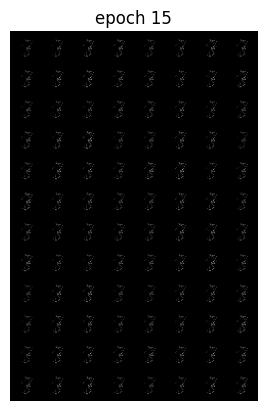

Epoch 15 of 100
Generator loss: 2.98358321, Discriminator loss: 1.28451991


118it [00:37,  3.16it/s]                                                                                               


Epoch 16 of 100
Generator loss: 3.18530178, Discriminator loss: 0.89897263


118it [00:37,  3.19it/s]                                                                                               


Epoch 17 of 100
Generator loss: 2.12024307, Discriminator loss: 1.53168917


118it [00:36,  3.20it/s]                                                                                               


Epoch 18 of 100
Generator loss: 0.83848804, Discriminator loss: 1.17219496


118it [00:36,  3.22it/s]                                                                                               


Epoch 19 of 100
Generator loss: 3.27025485, Discriminator loss: 0.40656704


118it [00:36,  3.21it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


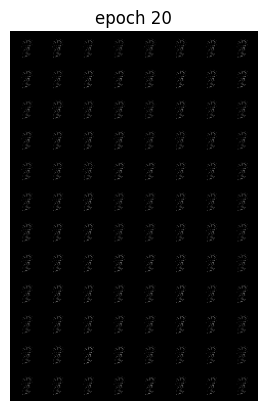

Epoch 20 of 100
Generator loss: 2.39702797, Discriminator loss: 0.47154582


118it [00:37,  3.18it/s]                                                                                               


Epoch 21 of 100
Generator loss: 1.56897295, Discriminator loss: 1.01220131


118it [00:37,  3.18it/s]                                                                                               


Epoch 22 of 100
Generator loss: 1.61281538, Discriminator loss: 0.73749518


118it [00:37,  3.19it/s]                                                                                               


Epoch 23 of 100
Generator loss: 2.30826879, Discriminator loss: 0.63475692


118it [00:37,  3.18it/s]                                                                                               


Epoch 24 of 100
Generator loss: 3.66076398, Discriminator loss: 0.48020759


118it [00:37,  3.16it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


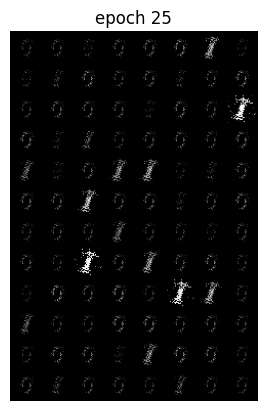

Epoch 25 of 100
Generator loss: 2.02849722, Discriminator loss: 0.55073220


118it [00:37,  3.14it/s]                                                                                               


Epoch 26 of 100
Generator loss: 2.47522879, Discriminator loss: 0.54009199


118it [00:37,  3.14it/s]                                                                                               


Epoch 27 of 100
Generator loss: 2.97147489, Discriminator loss: 0.54927343


118it [00:37,  3.14it/s]                                                                                               


Epoch 28 of 100
Generator loss: 2.10633016, Discriminator loss: 0.68231666


118it [00:38,  3.05it/s]                                                                                               


Epoch 29 of 100
Generator loss: 3.41961026, Discriminator loss: 0.57071424


118it [00:37,  3.11it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


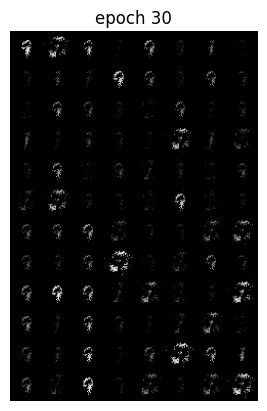

Epoch 30 of 100
Generator loss: 2.92711163, Discriminator loss: 0.33753023


118it [00:37,  3.11it/s]                                                                                               


Epoch 31 of 100
Generator loss: 3.23837686, Discriminator loss: 0.62734443


118it [00:38,  3.07it/s]                                                                                               


Epoch 32 of 100
Generator loss: 2.72326946, Discriminator loss: 0.58673251


118it [00:38,  3.10it/s]                                                                                               


Epoch 33 of 100
Generator loss: 2.85317349, Discriminator loss: 0.51543677


118it [00:37,  3.16it/s]                                                                                               


Epoch 34 of 100
Generator loss: 3.07579231, Discriminator loss: 0.58268160


118it [00:37,  3.17it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


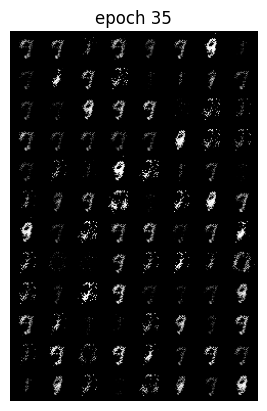

Epoch 35 of 100
Generator loss: 3.31319737, Discriminator loss: 0.45427781


118it [00:37,  3.14it/s]                                                                                               


Epoch 36 of 100
Generator loss: 3.96671104, Discriminator loss: 0.55937266


118it [00:38,  3.10it/s]                                                                                               


Epoch 37 of 100
Generator loss: 3.02693486, Discriminator loss: 0.54898453


118it [00:38,  3.09it/s]                                                                                               


Epoch 38 of 100
Generator loss: 3.14423871, Discriminator loss: 0.38662863


118it [00:38,  3.10it/s]                                                                                               


Epoch 39 of 100
Generator loss: 2.65621114, Discriminator loss: 0.49403998


118it [00:38,  3.07it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


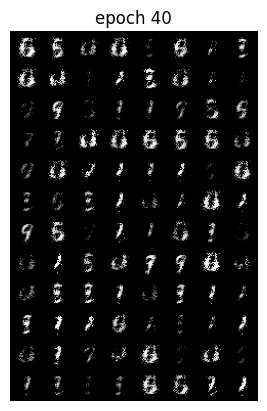

Epoch 40 of 100
Generator loss: 2.88725495, Discriminator loss: 0.56516188


118it [00:37,  3.14it/s]                                                                                               


Epoch 41 of 100
Generator loss: 2.51844168, Discriminator loss: 0.33220977


118it [00:37,  3.14it/s]                                                                                               


Epoch 42 of 100
Generator loss: 3.64222884, Discriminator loss: 0.56231380


118it [00:37,  3.12it/s]                                                                                               


Epoch 43 of 100
Generator loss: 3.09799838, Discriminator loss: 0.49353403


118it [00:38,  3.09it/s]                                                                                               


Epoch 44 of 100
Generator loss: 2.21791148, Discriminator loss: 0.55013716


118it [00:37,  3.11it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


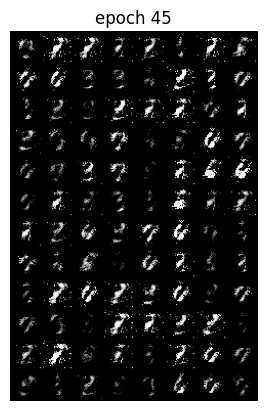

Epoch 45 of 100
Generator loss: 2.28951621, Discriminator loss: 0.81052697


118it [00:36,  3.26it/s]                                                                                               


Epoch 46 of 100
Generator loss: 2.18853474, Discriminator loss: 0.68774158


118it [00:37,  3.13it/s]                                                                                               


Epoch 47 of 100
Generator loss: 2.37245107, Discriminator loss: 0.48675746


118it [00:39,  2.99it/s]                                                                                               


Epoch 48 of 100
Generator loss: 2.49895287, Discriminator loss: 0.57043046


118it [00:38,  3.06it/s]                                                                                               


Epoch 49 of 100
Generator loss: 2.91452289, Discriminator loss: 0.48663563


118it [00:38,  3.09it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


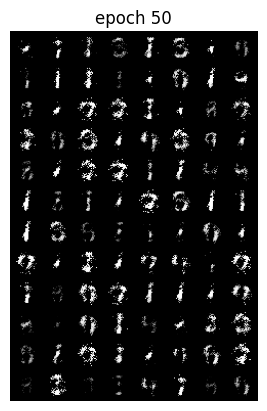

Epoch 50 of 100
Generator loss: 3.20920348, Discriminator loss: 0.35419881


118it [00:38,  3.06it/s]                                                                                               


Epoch 51 of 100
Generator loss: 2.94521904, Discriminator loss: 0.60518038


118it [00:38,  3.09it/s]                                                                                               


Epoch 52 of 100
Generator loss: 1.89018536, Discriminator loss: 0.60450500


118it [00:38,  3.09it/s]                                                                                               


Epoch 53 of 100
Generator loss: 2.56148458, Discriminator loss: 0.70196199


118it [00:37,  3.14it/s]                                                                                               


Epoch 54 of 100
Generator loss: 2.57015252, Discriminator loss: 0.48734877


118it [00:38,  3.10it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


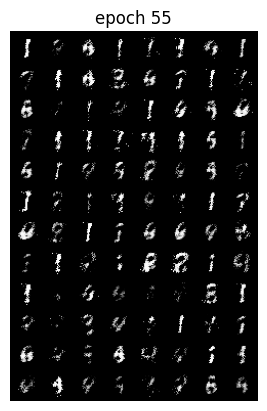

Epoch 55 of 100
Generator loss: 3.31095028, Discriminator loss: 0.60310519


118it [00:38,  3.08it/s]                                                                                               


Epoch 56 of 100
Generator loss: 2.54011345, Discriminator loss: 0.65912557


118it [00:38,  3.08it/s]                                                                                               


Epoch 57 of 100
Generator loss: 3.64364314, Discriminator loss: 0.49840587


118it [00:38,  3.10it/s]                                                                                               


Epoch 58 of 100
Generator loss: 2.33525348, Discriminator loss: 0.65517271


118it [00:38,  3.10it/s]                                                                                               


Epoch 59 of 100
Generator loss: 2.31376767, Discriminator loss: 0.79771817


118it [00:37,  3.13it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


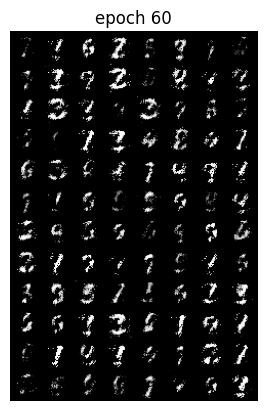

Epoch 60 of 100
Generator loss: 2.66561484, Discriminator loss: 0.44889301


118it [00:37,  3.12it/s]                                                                                               


Epoch 61 of 100
Generator loss: 2.99703479, Discriminator loss: 0.57433331


118it [00:37,  3.11it/s]                                                                                               


Epoch 62 of 100
Generator loss: 2.32586432, Discriminator loss: 0.84928155


118it [00:38,  3.07it/s]                                                                                               


Epoch 63 of 100
Generator loss: 2.62117648, Discriminator loss: 0.56261164


118it [00:38,  3.10it/s]                                                                                               


Epoch 64 of 100
Generator loss: 2.54140806, Discriminator loss: 0.57514936


118it [00:38,  3.09it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


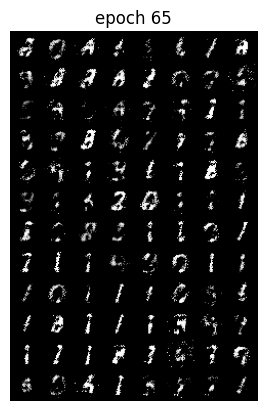

Epoch 65 of 100
Generator loss: 1.84642470, Discriminator loss: 0.73280466


118it [00:38,  3.10it/s]                                                                                               


Epoch 66 of 100
Generator loss: 1.97600830, Discriminator loss: 0.86328477


118it [00:37,  3.12it/s]                                                                                               


Epoch 67 of 100
Generator loss: 2.58880115, Discriminator loss: 0.63301373


118it [00:38,  3.09it/s]                                                                                               


Epoch 68 of 100
Generator loss: 3.02447200, Discriminator loss: 0.74007624


118it [00:38,  3.06it/s]                                                                                               


Epoch 69 of 100
Generator loss: 2.08298397, Discriminator loss: 0.55321306


118it [00:38,  3.09it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


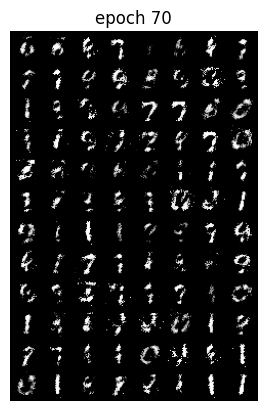

Epoch 70 of 100
Generator loss: 2.09535146, Discriminator loss: 0.66254330


118it [00:38,  3.09it/s]                                                                                               


Epoch 71 of 100
Generator loss: 2.54663920, Discriminator loss: 0.63155627


118it [00:38,  3.10it/s]                                                                                               


Epoch 72 of 100
Generator loss: 2.60493970, Discriminator loss: 0.71251202


118it [00:38,  3.06it/s]                                                                                               


Epoch 73 of 100
Generator loss: 2.09898329, Discriminator loss: 0.66841072


118it [00:37,  3.15it/s]                                                                                               


Epoch 74 of 100
Generator loss: 3.17442822, Discriminator loss: 0.49372286


118it [00:37,  3.11it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


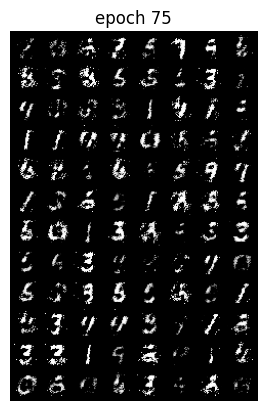

Epoch 75 of 100
Generator loss: 1.92231882, Discriminator loss: 0.86620694


118it [00:37,  3.11it/s]                                                                                               


Epoch 76 of 100
Generator loss: 2.36598015, Discriminator loss: 0.53575116


118it [00:39,  3.03it/s]                                                                                               


Epoch 77 of 100
Generator loss: 2.34558558, Discriminator loss: 0.62386191


118it [00:37,  3.16it/s]                                                                                               


Epoch 78 of 100
Generator loss: 1.96687543, Discriminator loss: 0.71070921


118it [00:37,  3.15it/s]                                                                                               


Epoch 79 of 100
Generator loss: 2.57811451, Discriminator loss: 0.75279897


118it [00:38,  3.05it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


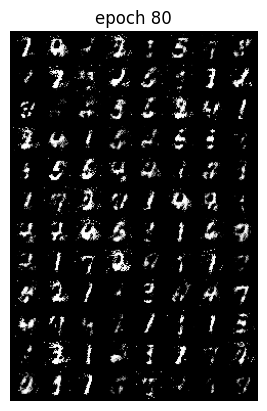

Epoch 80 of 100
Generator loss: 1.77102482, Discriminator loss: 0.68088764


118it [00:36,  3.20it/s]                                                                                               


Epoch 81 of 100
Generator loss: 1.98500061, Discriminator loss: 0.78565490


118it [00:37,  3.18it/s]                                                                                               


Epoch 82 of 100
Generator loss: 2.46227860, Discriminator loss: 0.68760353


118it [00:36,  3.21it/s]                                                                                               


Epoch 83 of 100
Generator loss: 2.87364268, Discriminator loss: 0.62273514


118it [00:36,  3.25it/s]                                                                                               


Epoch 84 of 100
Generator loss: 2.51146245, Discriminator loss: 0.91002333


118it [00:36,  3.21it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


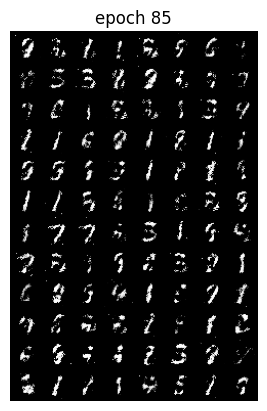

Epoch 85 of 100
Generator loss: 2.06089759, Discriminator loss: 0.82163215


118it [00:36,  3.23it/s]                                                                                               


Epoch 86 of 100
Generator loss: 2.00052071, Discriminator loss: 0.61890554


118it [00:36,  3.22it/s]                                                                                               


Epoch 87 of 100
Generator loss: 2.82153821, Discriminator loss: 0.55560690


118it [00:36,  3.20it/s]                                                                                               


Epoch 88 of 100
Generator loss: 2.11777687, Discriminator loss: 0.73398328


118it [00:36,  3.21it/s]                                                                                               


Epoch 89 of 100
Generator loss: 2.48128700, Discriminator loss: 0.71076441


118it [00:36,  3.21it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


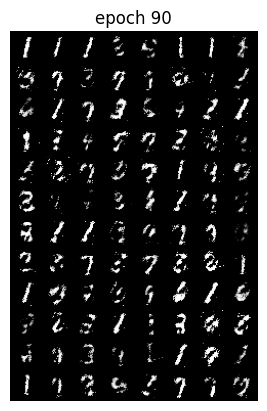

Epoch 90 of 100
Generator loss: 1.73381031, Discriminator loss: 0.84618229


118it [00:36,  3.23it/s]                                                                                               


Epoch 91 of 100
Generator loss: 2.15188861, Discriminator loss: 0.81694412


118it [00:37,  3.17it/s]                                                                                               


Epoch 92 of 100
Generator loss: 2.82566476, Discriminator loss: 0.81720805


118it [00:36,  3.23it/s]                                                                                               


Epoch 93 of 100
Generator loss: 1.56811965, Discriminator loss: 0.78002083


118it [00:36,  3.23it/s]                                                                                               


Epoch 94 of 100
Generator loss: 2.06184912, Discriminator loss: 0.63435292


118it [00:36,  3.23it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


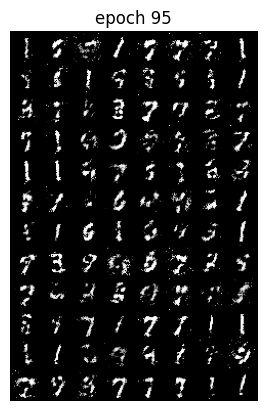

Epoch 95 of 100
Generator loss: 1.85073185, Discriminator loss: 0.93874401


118it [00:36,  3.21it/s]                                                                                               


Epoch 96 of 100
Generator loss: 2.80518794, Discriminator loss: 0.77451408


118it [00:36,  3.20it/s]                                                                                               


Epoch 97 of 100
Generator loss: 2.21790361, Discriminator loss: 0.69889057


118it [00:36,  3.19it/s]                                                                                               


Epoch 98 of 100
Generator loss: 1.88629341, Discriminator loss: 0.52309740


118it [00:36,  3.23it/s]                                                                                               


Epoch 99 of 100
Generator loss: 1.54156578, Discriminator loss: 0.90975237


118it [00:36,  3.25it/s]                                                                                               
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


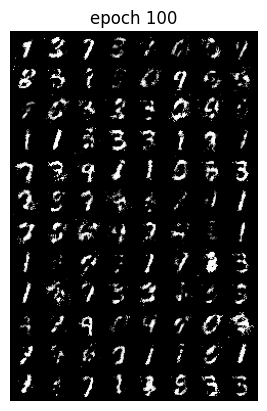

Epoch 100 of 100
Generator loss: 1.62498188, Discriminator loss: 0.75122070


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label) #calling the criterion function(i.e Binary Cross Entropy loss function) defined in cell 8
    
    ######################################
    
def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    
   
    
    
    
    ######################################
    

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        real_images, _ = data
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        # Train Discriminator
        for _ in range(k):
            optim_d.zero_grad()

            # Real data
            real_labels = label_real(batch_size)
            output_real = discriminator(real_images)
            loss_real = discriminator_loss(output_real, real_labels)

            # Fake data
            noise = create_noise(batch_size, nz)
            fake_images = generator(noise)
            fake_labels = label_fake(batch_size)
            output_fake = discriminator(fake_images.detach())
            loss_fake = discriminator_loss(output_fake, fake_labels)

            # Update discriminator
            loss_d = loss_real + loss_fake
            loss_d.backward()
            optim_d.step()

        # Train Generator
        optim_g.zero_grad()
        noise = create_noise(batch_size, nz)
        fake_labels = label_real(batch_size)  # Generator tries to fool the discriminator, so labels are real
        output = discriminator(generator(noise))
        loss_g = generator_loss(output, fake_labels)

        # Update generator
        loss_g.backward()
        optim_g.step()
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs_aa/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g  # total generator loss for the epoch
    epoch_loss_d = loss_d  # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs_aa/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs_aa/generator_images.gif', imgs)

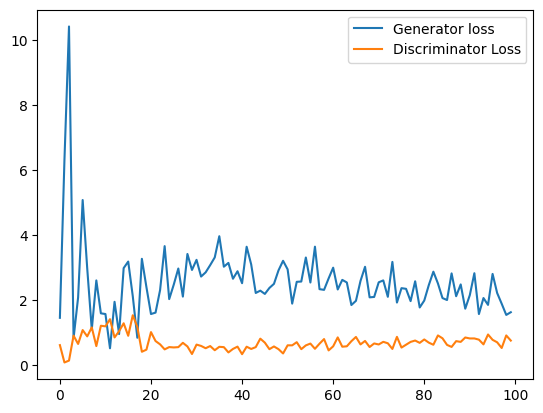

In [17]:
# plot and save the generator and discriminator loss
with torch.no_grad():
    plt.figure()
    plt.plot(losses_g, label='Generator loss')
    plt.plot(losses_d, label='Discriminator Loss')
    plt.legend()
    plt.savefig('outputs_aa/loss.png')